In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Loading dummy dataset
accident_data = pd.read_csv("/content/accident_data.csv")
accident_data

,Date,Time,Latitude,Longitude,Location Description,Weather Conditions,Road Conditions,Visibility,Accident Type,Injury Severity,Contributing Factors,Vehicle Type,No of Vehichles,Vehicle Speed,Day of Week,Month,Year
0,05-01-2022,15:30:00,40.7128,-74.0060,Highway,Foggy,Wet,Poor,Collision,Moderate,Speeding,Truck,1,45,Wednesday,January,2022
1,10-02-2022,18:45:00,41.8781,-87.6298,Street,Rainy,Wet,Poor,Rollover,Severe,Drunk Driving,Motorcycle,1,40,Thursday,February,2022
2,15-03-2022,12:00:00,37.7749,-122.4194,Intersection,Clear,Dry,Clear,Collision,Moderate,Weather,Car,2,25,Tuesday,March,2022
3,20-04-2022,09:20:00,34.0522,-118.2437,Highway,Clear,Dry,Clear,Collision,Minor,Other,Car,2,35,Wednesday,April,2022
4,25-05-2022,17:10:00,40.7128,-74.0060,Street,Rainy,Wet,Poor,Collision,Severe,Speeding,Car,1,50,Wednesday,May,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,10-08-2024,12:45:00,40.7128,-74.0060,Street,Rainy,Wet,Poor,Rollover,Severe,Drunk Driving,Motorcycle,1,30,Wednesday,August,2024
143,15-09-2024,08:30:00,37.7749,-122.4194,Highway,Clear,Dry,Clear,Collision,Moderate,Weather,Car,2,35,Thursday,September,2024
144,20-10-2024,16:20:00,34.0522,-118.2437,Street,Clear,Dry,Clear,Collision,Minor,Other,Car,2,45,Wednesday,October,2024
145,25-11-2024,14:10:00,40.7128,-74.0060,Intersection,Rainy,Wet,Poor,Collision,Severe,Speeding,Car,1,55,Thursday,November,2024


In [ ]:
# performing data cleaning and preparation

accident_data['Date'] = pd.to_datetime(accident_data['Date'])
accident_data['Time'] = pd.to_datetime(accident_data['Time'])

<ipython-input-2-bc0e47a80356>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  accident_data['Date'] = pd.to_datetime(accident_data['Date'])


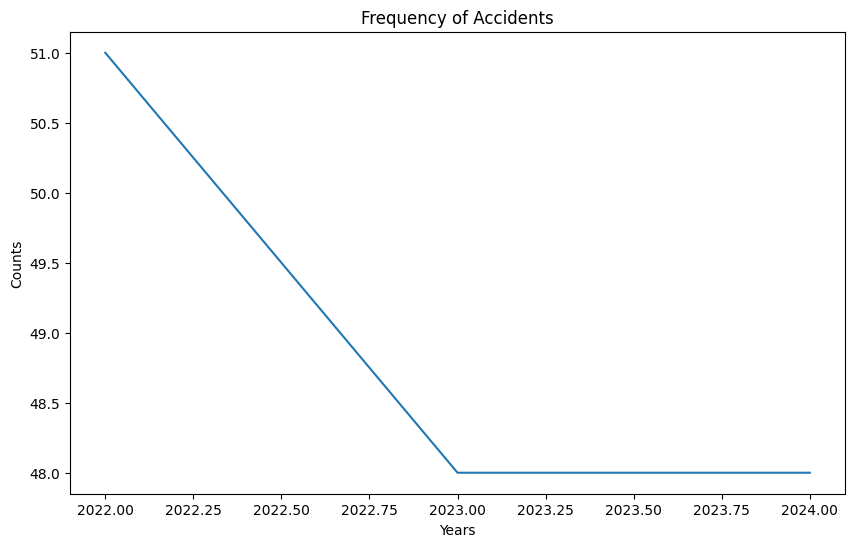

In [ ]:
# Performing exploratory data analysis (EDA)

plt.figure(figsize=(10,6))
accident_data.groupby(accident_data['Date'].dt.year)['Accident Type'].count().plot(kind='line')
plt.title("Frequency of Accidents")
plt.xlabel("Years")
plt.ylabel("Counts")
plt.show()

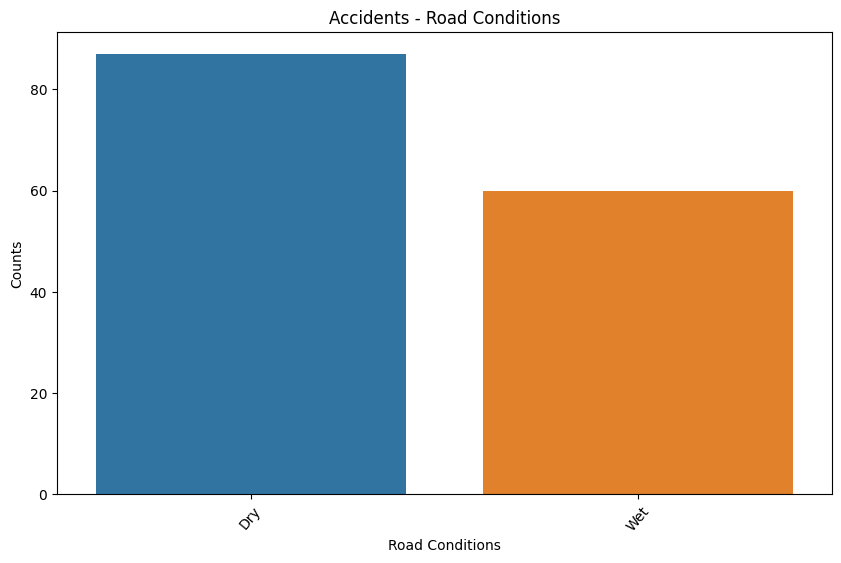

In [ ]:
#Identifying patterns and correlations
#Visualize accidents by road conditions

plt.figure(figsize=(10,6))
sns.countplot(x ='Road Conditions', data=accident_data, order=accident_data['Road Conditions'].value_counts().index)
plt.title("Accidents - Road Conditions")
plt.xlabel("Road Conditions")
plt.ylabel("Counts")
plt.xticks(rotation=50)
plt.show()

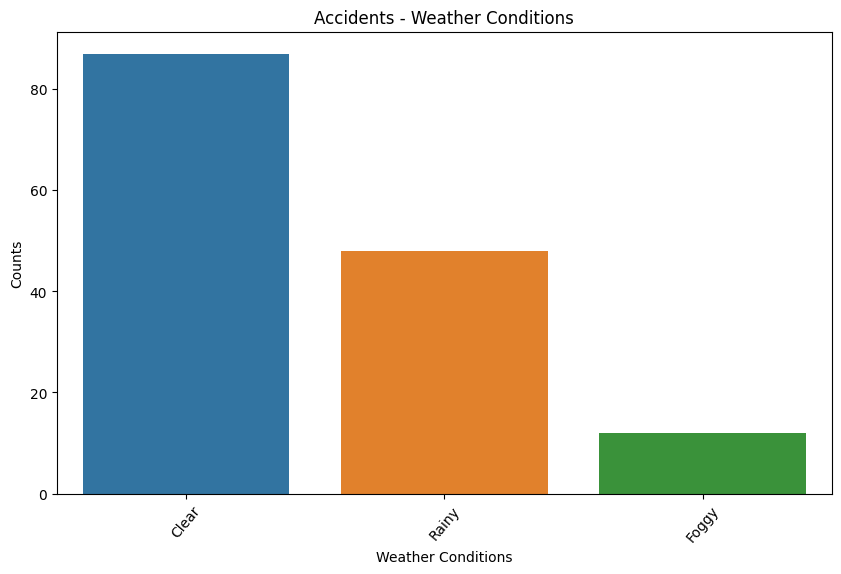

In [ ]:
#Visualize accidents by weather conditions

plt.figure(figsize=(10,6))
sns.countplot(x ="Weather Conditions", data=accident_data, order=accident_data["Weather Conditions"].value_counts().index)
plt.title("Accidents - Weather Conditions")
plt.xlabel("Weather Conditions")
plt.ylabel("Counts")
plt.xticks(rotation=50)
plt.show()

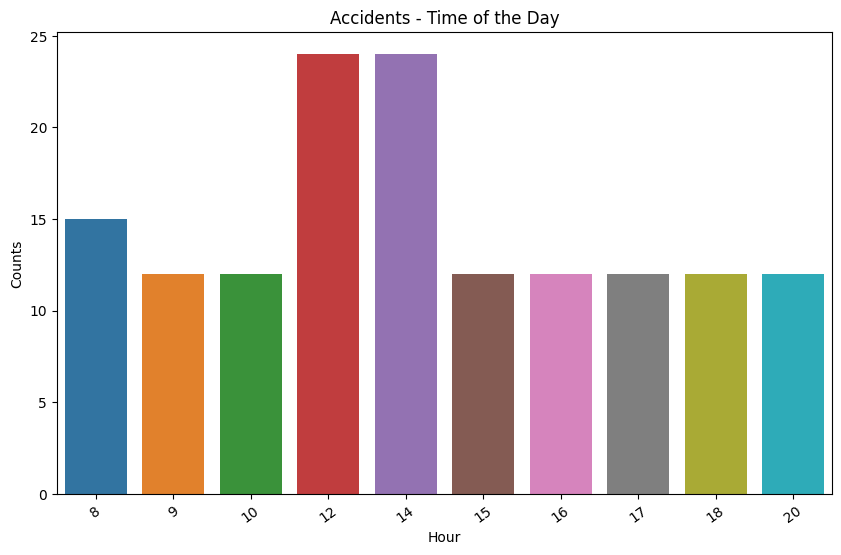

In [ ]:
#Visualizing accidents by the time of day

plt.figure(figsize=(10,6))
accident_data['Hour']=accident_data['Time'].dt.hour
sns.countplot(x ="Hour", data=accident_data)
plt.title("Accidents - Time of the Day")
plt.xlabel("Hour")
plt.ylabel("Counts")
plt.xticks(rotation=36)
plt.show()

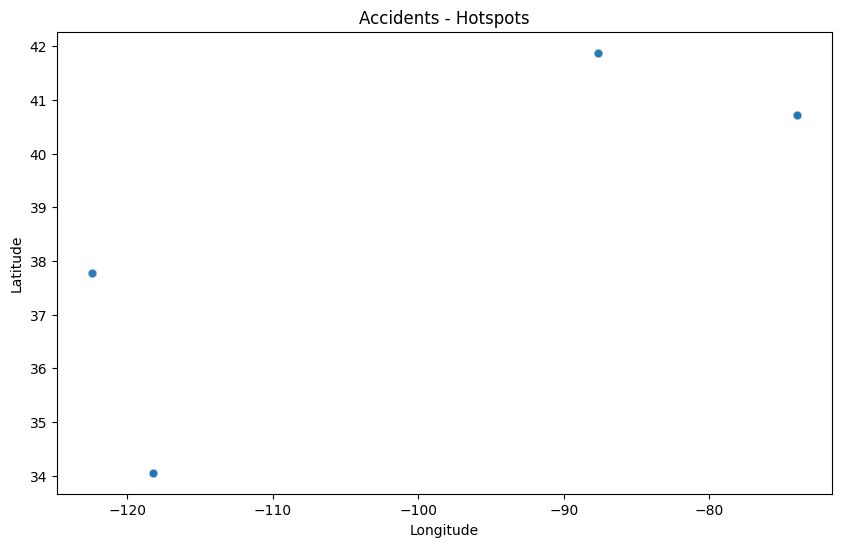

In [ ]:
#Performing Spatial Analysis
#Scatter plot of accident locations

plt.figure(figsize=(10,6))
sns.scatterplot(x ="Longitude", y = "Latitude", data=accident_data, alpha = 0.1)
plt.title("Accidents - Hotspots")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()